In [15]:
nx = 161
ny = 161
nt = 300
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

0.0025000000000000005

In [16]:
x = range(0, 2, length=nx)
y = range(0, 2, length=ny)

u = ones((ny, nx)) ##create a 1xn vector of 1's
un = ones((ny, nx, nt)) ##

u[Int(round(0.5 / dy)):Int(round(1 / dy + 1)), Int(round(0.5 / dx)):Int(round(1 / dx + 1))] .= 2;

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
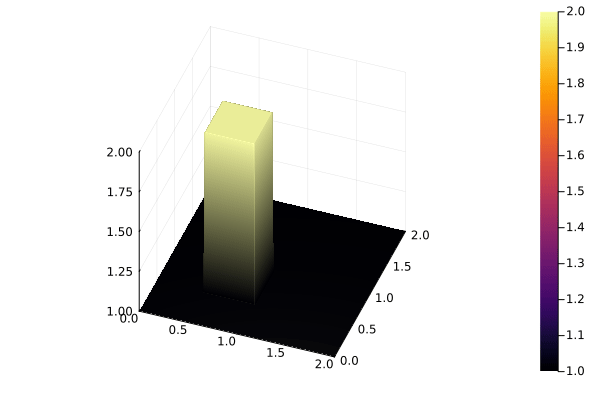

In [17]:
using Plots
#surface(x, y, u)

@gif for i in range(0, stop=2π, length=50)
    p = surface(x, y, u, camera=(10 * (1 + cos(i)), 40))
end

In [18]:
un[:, :, 1] = copy(u)
row, col = size(u)

for n ∈ 1:nt-1, j in 2:row, i in 2:col
        un[j, i, n+1] = un[j, i, n] - (c * dt / dx * (un[j, i, n] - un[j, i-1, n])) -
                        (c * dt / dy * (un[j, i, n] - un[j-1, i, n]))
end

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
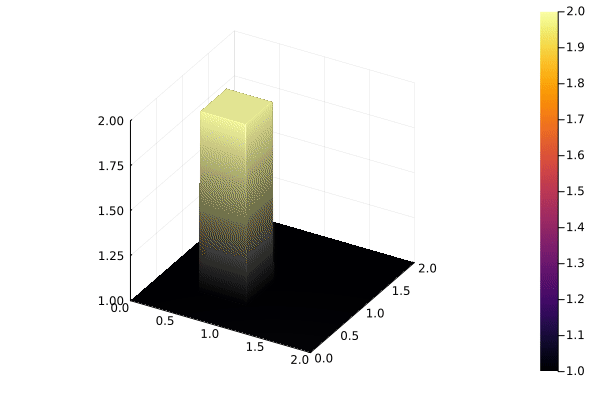

In [20]:
@gif for n ∈ 1:nt
    surface(x, y, un[:, :, n], ylims=(0, 2), xlims=(0, 2), zlims=(1, 2))
end